In [1]:
import uproot 
import boost_histogram as bh
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
import awkward as ak
import pandas as pd
import numpy as np
import seaborn as sns
import hist

In [2]:
import sys,os
sys.path.append("/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/lib")
from utils import *
from setting import setting

In [17]:
cutcat = 'resolved'
cat = '2lep'
tag = 'btag'
year = '2018'
varb = 'mass2l2jet_rebin'

In [4]:
f = uproot.open('/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/hist_2018.root')
f'DY/merged_tag/SR/{cat}/{tag}/massZZ;1' in f.keys()
f.close()

In [18]:
Alph_path = f'/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/BackgroundEstimation/AlphaFile/AlphaRaio{year}_resolved.root'
Alph_array = uproot.lazy([f"{Alph_path}:alphatree"])

In [28]:
print(Alph_array['resolved_isEE'])

[0.381, 0.331, 0.332, 0.324, 0.307, 0.3, ... 0.228, 0.264, 0.252, 0.367, 0.278]


In [22]:
alpha_f = uproot.open(f'/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/BackgroundEstimation/AlphaFile/AlphaHistoFromROOT_2016.root')

In [30]:
h = alpha_f["merged_tag_isEE_btag"].to_hist()


In [31]:
h.values()

array([ 0.76117192,  0.96051067,  0.70310798,  0.59107334,  0.42200168,
        0.49881279,  0.36391879,  0.41222494,  0.58558408, -0.09164487,
        0.18311739,  0.15735267])

In [ ]:
input_hist = GetROOTHisto(year,cutcat).hist

In [ ]:
GetROOTHisto(year,cutcat)

In [70]:
input_hist['resolved']

{'DY_pt50To100_CR_isEE_btag_mass2l': None,
 'DY_pt50To100_CR_isEE_btag_pt2l': None,
 'DY_pt50To100_CR_isEE_btag_massmerged': None,
 'DY_pt50To100_CR_isEE_btag_ptmerged': None,
 'DY_pt50To100_CR_isEE_btag_mass2l2jet_rebin': None,
 'DY_pt50To100_CR_isEE_btag_mass2l2jet': None,
 'DY_pt50To100_CR_isEE_btag_mass2lj': None,
 'DY_pt50To100_CR_isEE_btag_pt2jet': None,
 'DY_pt50To100_CR_isEE_btag_mass2jet': None,
 'DY_pt50To100_CR_isEE_btag_particleNetZvsQCD': None,
 'DY_pt50To100_CR_isEE_btag_particleNetZbbvslight': None,
 'DY_pt50To100_CR_isEE_btag_KD_jjVBF': None,
 'DY_pt50To100_CR_isEE_btag_KD_JVBF': None,
 'DY_pt50To100_CR_isEE_btag_KD_ZJ': None,
 'DY_pt50To100_CR_isEE_btag_KD_Zjj': None,
 'DY_pt50To100_CR_isEE_btag_lep_1_pt': None,
 'DY_pt50To100_CR_isEE_btag_lep_2_pt': None,
 'DY_pt50To100_CR_isEE_untag_mass2l': None,
 'DY_pt50To100_CR_isEE_untag_pt2l': None,
 'DY_pt50To100_CR_isEE_untag_massmerged': None,
 'DY_pt50To100_CR_isEE_untag_ptmerged': None,
 'DY_pt50To100_CR_isEE_untag_mass2l2

In [11]:
hist_DY_CR =  input_hist[cutcat][f'DY_pt50To100_CR_{cat}_{tag}_{varb}']+input_hist[cutcat][f'DY_pt100To250_CR_{cat}_{tag}_{varb}']+input_hist[cutcat][f'DY_pt250To400_CR_{cat}_{tag}_{varb}']+input_hist[cutcat][f'DY_pt400To650_CR_{cat}_{tag}_{varb}']+input_hist[cutcat][f'DY_pt650ToInf_CR_{cat}_{tag}_{varb}']
hist_DY_SR =  input_hist[cutcat][f'DY_pt50To100_SR_{cat}_{tag}_{varb}']+input_hist[cutcat][f'DY_pt100To250_SR_{cat}_{tag}_{varb}']+input_hist[cutcat][f'DY_pt250To400_SR_{cat}_{tag}_{varb}']+input_hist[cutcat][f'DY_pt400To650_SR_{cat}_{tag}_{varb}']+input_hist[cutcat][f'DY_pt650ToInf_SR_{cat}_{tag}_{varb}']

In [22]:
bkg = hist_DY_CR.view(flow=False).value
bkg

array([7.46476579e+01, 2.76599467e+01, 1.07515468e+01, 5.33454121e+00,
       2.28038237e+00, 1.78064740e+00, 6.13227411e-01, 4.27530695e-01,
       2.21528639e-01, 2.31297920e-01, 1.45169941e-01, 3.43969341e-02])

In [5]:
import ROOT

Welcome to JupyROOT 6.26/00


In [20]:
class GetROOTHisto(setting):
    def __init__(self,year: str, cutcat: str) -> None:
        '''input: lep, resolved merged_notag or merged_tag or all'''
        super().__init__() #attribute from setting

        self.year = year
        self.cutcat = cutcat
        self.hist = {}
        self.inputrootfile = f'/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/hist_{self.year}.root'
        self.file = ROOT.TFile.Open(self.inputrootfile,'READ')

        self.massZZvarb = {
            'resolved':'mass2l2jet_rebin',
            'merged_tag':'mass2lj_rebin'
        }

        use_helvet = True  ## true: use helvetica for plots, make sure the system have the font installed
        if use_helvet:
            CMShelvet = hep.style.CMS
            CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
            plt.style.use(CMShelvet)
        else:
            plt.style.use(hep.style.CMS)

        if self.cutcat == 'lep':
            self.hist['lep'] = self.getlepthisto()
        elif self.cutcat=='resolved':
            self.hist['resolved'] = {}
            for sample in self.fileset[self.year].keys():
                for reg in self.regions:
                    for cat in self.leptonic_cut_cats:
                        for tag in self.tags:
                            for varb in self.config['bininfo'].keys():
                                if varb == 'mass2l2jet':
                                    #h[f'{sample}_{reg}_{cat}_{tag}_{varb}_rebin'] = f[f'{sample}/resolved/{reg}/{cat}/{tag}/{varb}_rebin'].to_boost()
                                    #h[f'{sample}_{reg}_{cat}_{tag}_{varb}_rebin'] = self.file.Get(f'{sample}/resolved/{reg}/{cat}/{tag}/{varb}_rebin')#[f'{sample}/resolved/{reg}/{cat}/{tag}/{varb}_rebin']
                                    self.hist['resolved'][f'{sample}_{reg}_{cat}_{tag}_{varb}_rebin'] = self.file.Get(f'{sample}/resolved/{reg}/{cat}/{tag}/{varb}_rebin')#[f'{sample}/resolved/{reg}/{cat}/{tag}/{varb}_rebin']
                                    if self.hist['resolved'][f'{sample}_{reg}_{cat}_{tag}_{varb}_rebin']==None:
                                        print("error can not get histo")
                                    #if f[f'DY/resolved/{reg}/{cat}/{tag}/massZZ'] and reg=='SR':
                                    #temphitoname = f'DY/resolved/{reg}/{cat}/{tag}/massZZ'
                                    #if reg=='SR' and (temphitoname in f.keys()):
                                        #h[f'DY_{reg}_{cat}_{tag}_massZZ'] = f[f'DY/resolved/{reg}/{cat}/{tag}/massZZ'].to_boost()
                                    #    h[f'DY_{reg}_{cat}_{tag}_massZZ'] = f.Get(f'DY/resolved/{reg}/{cat}/{tag}/massZZ')#[f'DY/resolved/{reg}/{cat}/{tag}/massZZ']
                                #h[f'{sample}_{reg}_{cat}_{tag}_{varb}'] = f[f'{sample}/resolved/{reg}/{cat}/{tag}/{varb}'].to_boost()
                                #h[f'{sample}_{reg}_{cat}_{tag}_{varb}'] = self.file.Get(f'{sample}/resolved/{reg}/{cat}/{tag}/{varb}')#[f'{sample}/resolved/{reg}/{cat}/{tag}/{varb}']
                                self.hist['resolved'][f'{sample}_{reg}_{cat}_{tag}_{varb}'] = self.file.Get(f'{sample}/resolved/{reg}/{cat}/{tag}/{varb}')#[f'{sample}/resolved/{reg}/{cat}/{tag}/{varb}']
            #print(self.hist['resolved'])
            #print('1')
        #######################################################################
        #self.AlphaProduce()
        self.AlphaPlot()
    
    def AlphaProduce(self):
        #for cutcat in self.cutcats:
        #with uproot.recreate(f"{self.outAlphafilepath}/AlphaHisto_{self.year}.root") as fout:
        with uproot.recreate(f"./AlphaHistoTEST_{self.year}.root") as fout:
            AlphaBranch = {}
            for cat in self.leptonic_cut_cats:
                for tag in self.tags:
                    c = ROOT.TCanvas(f'alhpa_{cat}_{tag}',f'alhpa_{cat}_{tag}',600,600)
                    hist_DY_CR = self.hist[self.cutcat][f'DY_pt50To100_CR_{cat}_{tag}_{self.massZZvarb[self.cutcat]}']
                    hist_DY_CR.Sumw2()
                    #hist_DY_CR.Add(self.hist[self.cutcat][f'DY_pt50To100_CR_{cat}_{tag}_{self.massZZvarb[self.cutcat]}'])
                    hist_DY_CR.Add(self.hist[self.cutcat][f'DY_pt100To250_CR_{cat}_{tag}_{self.massZZvarb[self.cutcat]}'])
                    hist_DY_CR.Add(self.hist[self.cutcat][f'DY_pt250To400_CR_{cat}_{tag}_{self.massZZvarb[self.cutcat]}'])
                    hist_DY_CR.Add(self.hist[self.cutcat][f'DY_pt400To650_CR_{cat}_{tag}_{self.massZZvarb[self.cutcat]}'])
                    hist_DY_CR.Add(self.hist[self.cutcat][f'DY_pt650ToInf_CR_{cat}_{tag}_{self.massZZvarb[self.cutcat]}'])

                    hist_DY_SR = self.hist[self.cutcat][f'DY_pt50To100_SR_{cat}_{tag}_{self.massZZvarb[self.cutcat]}'] 
                    hist_DY_SR.Sumw2()
                    hist_DY_SR.Add(self.hist[self.cutcat][f'DY_pt50To100_SR_{cat}_{tag}_{self.massZZvarb[self.cutcat]}'])
                    hist_DY_SR.Add(self.hist[self.cutcat][f'DY_pt100To250_SR_{cat}_{tag}_{self.massZZvarb[self.cutcat]}'])
                    hist_DY_SR.Add(self.hist[self.cutcat][f'DY_pt250To400_SR_{cat}_{tag}_{self.massZZvarb[self.cutcat]}'])
                    hist_DY_SR.Add(self.hist[self.cutcat][f'DY_pt400To650_SR_{cat}_{tag}_{self.massZZvarb[self.cutcat]}'])
                    hist_DY_SR.Add(self.hist[self.cutcat][f'DY_pt650ToInf_SR_{cat}_{tag}_{self.massZZvarb[self.cutcat]}'])

                    hist_DY_SR.Divide(hist_DY_CR)

                    fout[f'{cutcat}_{cat}_{tag}'] = hist_DY_SR

                    #f, ax = plt.subplots(figsize=(10, 10))
                    #hep.cms.label(data=True, llabel='Preliminary', year=self.year, ax=ax, rlabel=r'%s $fb^{-1}$ (13 TeV)' %self.config['lumi'][self.year], fontname='sans-serif')
                    #hep.histplot(hist_DY_SR,label = 'Alhpa Ratio')
                    #ax.set_xlabel(r'$M_{ZZ}$ [GeV]', ha='right', x=1.0)
                    #ax.set_ylabel('Ratio', ha='right', y=1.0)
                    #plt.savefig(f'./alhpa_{cat}_{tag}_test.png')
                    #hist_DY_SR.Draw()
                    #c.SaveAs(f'./alhpa_{cat}_{tag}_test.png')

    def AlphaPlot(self):
        x_axis = np.append(self.massZZ_low_bins,self.massZZ_high_bins)
        #with uproot.open(f"./AlphaHistoTEST_{self.year}.root") as file:
        file = ROOT.TFile(f"./AlphaHistoTEST_{self.year}.root","READ")
        self.leptonic_cut_cats = ['2lep']
        for cat in self.leptonic_cut_cats:
            for tag in self.tags:
                #h = file[f'{cutcat}_{cat}_{tag}'].to_hist()
                h = file.Get(f'{cutcat}_{cat}_{tag}')
                #h_content = h.view(flow=False).value
                #h_err = np.sqrt(h_content)
                #print(f'{tag} {h_err}')
                #plot
                x_pos = []
                y_val = []
                x_err = []
                y_err = []
                f, ax = plt.subplots(figsize=(10, 10))
                hep.cms.label(data=True, llabel='Preliminary', year=self.year, ax=ax, rlabel=r'%s $fb^{-1}$ (13 TeV)' %self.config['lumi'][self.year], fontname='sans-serif')
                #hep.histplot(h,label = 'Alhpa Ratio',histtype='errorbar', color='k', markersize=15, elinewidth=1.5)
                for i in range(0,len(x_axis)-1):
                    x = (x_axis[i]+x_axis[i+1])/2
                    x_pos.append(x)
                    #y = h_content[i]
                    y = h.GetBinContent(i)
                    y_val.append(y)
                    xerr = (x_axis[i+1]-x_axis[i])/2
                    x_err.append(xerr)
                    #yerr = h_err[i]
                    yerr = h.GetBinError(i)
                    y_err.append(yerr)
                    ax.plot(x,y,'o', markersize=2 ,color='black')
                print(f'{tag} {y_err}')
                ax.errorbar(x_pos,y_val,xerr=x_err,yerr=y_err,elinewidth = 1.0,linestyle='none',color='black',label = 'Alpha Ratio')
                ax.set_xlabel(r'$M_{ZZ}$ [GeV]', ha='right', x=1.0)
                ax.set_ylabel('Ratio', ha='right', y=1.0)
                if tag == 'untag':
                    ax.set_ylim(-0.5, 1.0)
                else:
                    ax.set_ylim(-0.5, 1.5)
                ax.text(0.05, 0.92, f'{self.text[cat]}', transform=ax.transAxes, fontweight='bold')
                ax.legend(loc='upper right') 
                plt.savefig(f'./alhpa_{cat}_{tag}_test.png')
                #plt.close()
    def AlphaApply(self):
        alpha_file = ROOT.TFile(f"./AlphaHistoTEST_{self.year}.root","READ")
        with uproot.update(f'/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/hist_{self.year}.root') as fout:
            for cutcat in self.cutcats:
                for cat in self.leptonic_cut_cats:
                    hist_tt_CR = self.hist[cutcat][f'TTTo2L2Nu_CR_{cat}_{tag}_{self.massZZvarb[cutcat]}']; hist_tt_CR.Sumw2()
                    hist_tt_CR.Add(self.hist[cutcat][f'WWTo2L2Nu_CR_{cat}_{tag}_{self.massZZvarb[cutcat]}'])
                    hist_zv_CR = self.hist[cutcat][f'WZTo2Q2L_CR_{cat}_{tag}_{self.massZZvarb[cutcat]}']; hist_zv_CR.Sumw2()
                    hist_zv_CR.Add(self.hist[cutcat][f'ZZTo2Q2L_CR_{cat}_{tag}_{self.massZZvarb[cutcat]}'])

                    hist_data = self.hist[cutcat][f'Data_CR_{cat}_{tag}_{self.massZZvarb[cutcat]}']; hist_data.Sumw2()

                    hist_data.Add(hist_tt_CR,-1)
                    hist_data.Add(hist_zv_CR,-1)

                    alpha_hist = alpha_file.Get(f'{cutcat}_{cat}_{tag}')

                    hist_data.Multiply(alpha_hist)

                    fout[f'DY/{cutcat}/SR/{cat}/{tag}/massZZ'] = hist_data
    
    def massZZplot(self):
        if(not self.useuproot):
            for cutcat in self.cutcats:
                self.input_hist[cutcat] = GetHisto(self.year,cutcat).hist
        with uproot.update(f'/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/hist_{self.year}.root') as fout:
            for cutcat in self.cutcats:
                for cat in self.leptonic_cut_cats:
                    hist_tt_SR = self.input_hist[cutcat][cutcat][f'TTTo2L2Nu_SR_{cat}_{tag}_{self.varb[cutcat]}']+self.input_hist[cutcat][cutcat][f'WWTo2L2Nu_SR_{cat}_{tag}_{self.varb[cutcat]}']
                    hist_zv_SR = self.input_hist[cutcat][cutcat][f'WZTo2Q2L_SR_{cat}_{tag}_{self.varb[cutcat]}']+self.input_hist[cutcat][cutcat][f'ZZTo2Q2L_SR_{cat}_{tag}_{self.varb[cutcat]}']
                    dy_SR_histo = self.input_hist[cutcat][cutcat][f'DY_{reg}_{cat}_{tag}_massZZ']

                    edge = np.append(setting().massZZ_low_bins,setting().massZZ_high_bins)
                    f, ax = plt.subplots(figsize=(10, 10))
                    hep.cms.label(data=True, llabel='Preliminary', year=self.year, ax=ax, rlabel=r'%s $fb^{-1}$ (13 TeV)' %setting().config['lumi'][self.year], fontname='sans-serif')
                    #hep.cms.label(data=True, year=year, ax=ax, rlabel=r'%s $fb^{-1}$ (13 TeV)'%lumi[year], fontname='sans-serif')
                
                    hep.histplot([hist_zv_SR,hist_tt_SR,dy_SR_histo],label=[f'MC ({var})' for var in ['WZ,ZZ','TT,WW','Z+jets']],histtype='fill', edgecolor='k', linewidth=1, stack=True) ## draw MC
                    ax.set_xlabel(r'$M_{ZZ}$ [GeV]', ha='right', x=1.0)
                    ax.set_ylabel('Events / bin', ha='right', y=1.0)
                
                    ##SIGNAL
                    #colors = ['blue', 'red']
                    #hep.histplot(signal_hists['SR'][cat],label=[ var for var in ['ggH(m1000)x10','VBF(m1500)x10']],linestyle=[style for style in [':','--']], color=[color for color in colors])
                
                    #bkg_hist = bkg_hists['SR']['isEE'][0]+bkg_hists['SR']['isEE'][1]+bkg_hists['SR']['isEE'][2]
                    bkg_tot = hist_zv_SR.values()+hist_tt_SR.values()+dy_SR_histo.values()
                    #bkg_err = np.sqrt(bkg_tot)
                    bkg_err = get_err(hist_zv_SR+hist_tt_SR+dy_SR_histo)
                    #print(f'bkg_err in {cat} = {bkg_err}')
                    ax.fill_between(edge, (bkg_tot-bkg_err).tolist()+[0], (bkg_tot+bkg_err).tolist()+[0], label='BKG total unce.', step='post', hatch='\\\\', edgecolor='darkblue', facecolor='none', linewidth=0) ## draw bkg unce.
                    #ax.fill_between(edge, (bkg_tot-bkg_err-alpha_arr[f'Err_{cutcat}_{cat}_{tag}']).tolist()+[0], (bkg_tot-bkg_err).tolist()+[0], label='Alpha total unce.', step='post', hatch='xx', edgecolor='darkgrey', facecolor='none', linewidth=0) ## draw bkg unce.
                    ax.fill_between(edge, (bkg_tot+bkg_err).tolist()+[0], (bkg_tot+bkg_err+alpha_arr[f'Err_{cutcat}_{cat}_{tag}']).tolist()+[0],step='post', hatch='xx', edgecolor='darkgrey', facecolor='none', linewidth=0) ## draw bkg unce.
                
                    ax.set(yscale = "log")
                    ax.set_ylim(1e-1, 3*ax.get_ylim()[1])
                    ax.text(0.05, 0.92, f'{setting().text[cat]}', transform=ax.transAxes, fontweight='bold') 
                    ax.legend(fontsize=18)
                    savepath = f'/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/Plot/plots/{cutcat}/{self.year}'
                    if not os.path.exists(savepath):
                        os.mkdir(savepath)
                    plt.savefig(f'/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/Plot/plots/{cutcat}/{self.year}/massZZ_SR_{cat}_{tag}.png')
                    #plt.show()
                    plt.close()


                    






                    


            


        
    #def AlphaApply(self):

    

btag [0.03888012030825957, 0.08311568375080547, 0.12307510986831487, 0.13371516348221638, 0.21019015682875494, 0.4640593177534924, 0.391472835948689, 1.3500801379574388, 0.38764254404012644, 1.4191320068902202, 0.4671484229175051, 3.8413974846509285]
untag [0.0036943180489971594, 0.006781275612509781, 0.010110060509686629, 0.014762668543781362, 0.021160451052768876, 0.029172600626245777, 0.041998537824158966, 0.05258265190513855, 0.07074710217639556, 0.09091080340021145, 0.11471587893712054, 0.10739417621714135]
vbftag [0.02756013711017042, 0.04592791676255947, 0.0588696449753531, 0.08333474153581384, 0.11738854331964337, 0.1797247015205129, 0.21606269474718057, 0.27329591999656244, 0.3782593390691671, 0.270234065375412, 0.5668688862498208, 0.3158701963874387]
all [0.003645547002278345, 0.006687138897328912, 0.009931735791697744, 0.014474744988600501, 0.020748031162870544, 0.028766069586853717, 0.04103280510272853, 0.05168258414994141, 0.06929207231605318, 0.08756844397893312, 0.111550

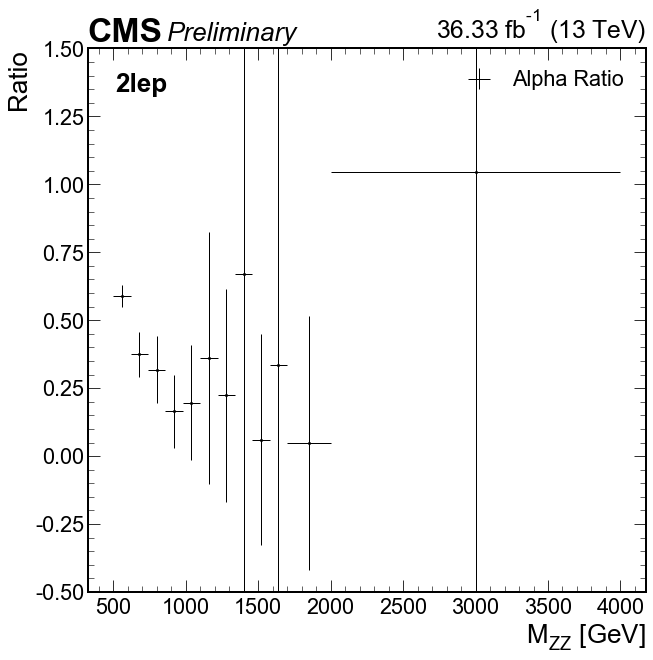

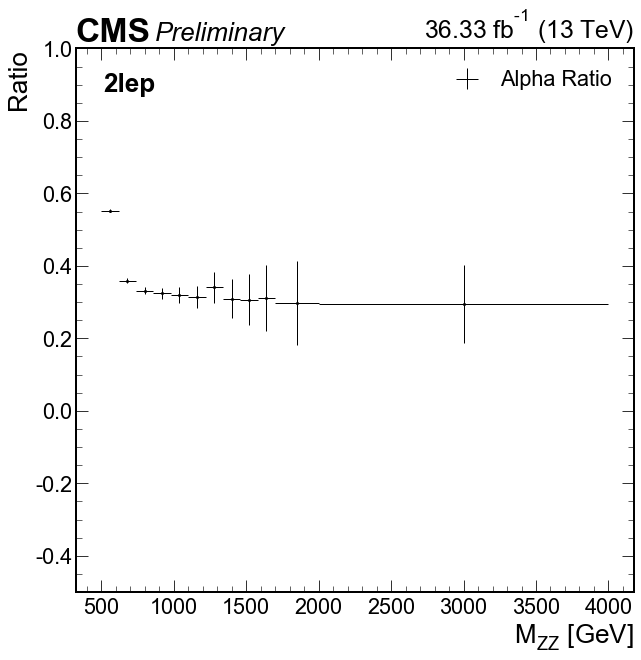

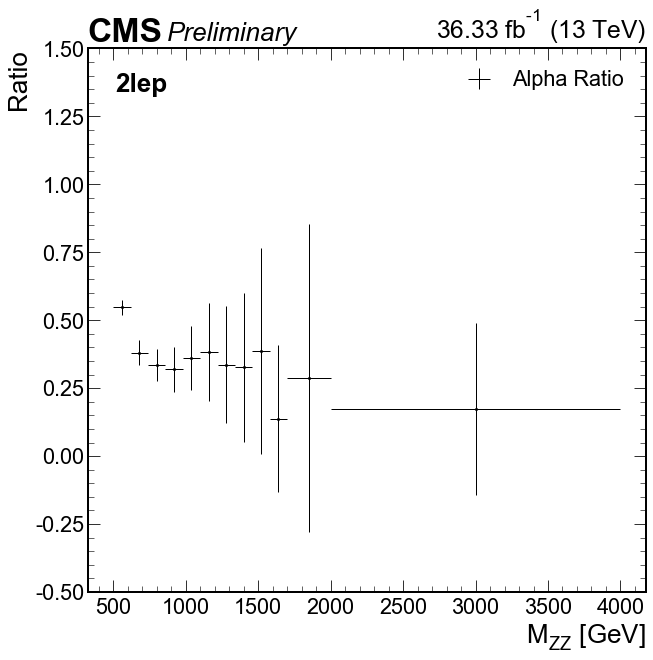

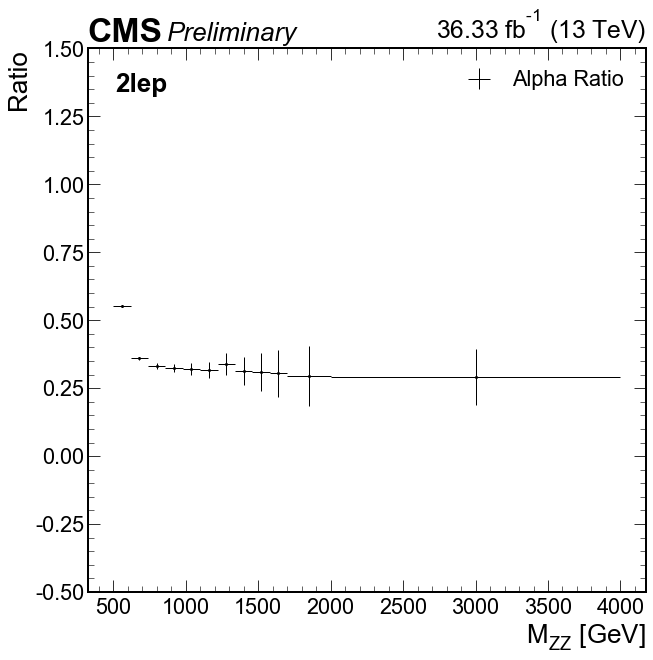

In [21]:
GetROOTHisto(year,cutcat)

In [32]:
inputrootfile = f'/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/hist_2016.root'
f = ROOT.TFile(inputrootfile,'READ')

In [35]:
h = {}
h['1'] = {}
h['1']['2'] = f.Get(f'DY_pt50To100/resolved/CR/{cat}/{tag}/{varb}')

In [43]:
print(h)

{'1': {'2': <cppyy.gbl.TH1D object at 0x55ae8000d1e0>}}


NameError: name 'c1' is not defined